<a href="https://colab.research.google.com/github/DeepakBadarinath/MPSheet5/blob/main/MPSheet5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [73]:
import numpy as np
import matplotlib.pyplot as plt

In [74]:
#Functions to be used for sigma and b
def identity(x):
  return x

def unit(x):
  return np.ones(np.shape(x))

def squared(x):
  return x**2

def zero(x):
  return np.zeros(np.shape(x))

In [75]:
# One step transition given x0 , h ,sigma and b
def one_step_transition(x0,h,sigma,b):
  dim = np.shape(x0)[0]
  Z = np.random.normal(0,1,size=(dim,dim))
  return (x0 + np.sqrt(h)*np.dot(Z,sigma(x0)) + h*b(x0))

In [76]:
one_step_transition(np.array([0,0.53,1.55,5.32]),0.025,unit,squared)

array([0.35424777, 0.94096747, 1.90613888, 5.87662304])

In [77]:
# simulate process uptil time N steps, returns the times and postions vectors
# !!Feed x0 being an numpy array!!
def simulate(x0,h,N,sigma,b):
  times = [0]
  positions = [x0]
  for i in range(N):
    xnew = one_step_transition(x0,h,sigma,b)
    x0 = xnew
    times.append(h*(i+1))
    positions.append(xnew)
  return (times, positions)


In [78]:
simulate(np.array([0,0,0]),0.025,10,unit,squared)

([0,
  0.025,
  0.05,
  0.07500000000000001,
  0.1,
  0.125,
  0.15000000000000002,
  0.17500000000000002,
  0.2,
  0.225,
  0.25],
 [array([0, 0, 0]),
  array([-0.20205298,  0.10092844,  0.20664905]),
  array([-0.33826952,  0.00541775,  0.07038559]),
  array([-0.25867656, -0.13366055,  0.24850275]),
  array([-0.19946275,  1.12491192,  0.12847038]),
  array([ 0.08975066,  1.26575565, -0.03467531]),
  array([ 0.16745928,  0.94623746, -0.29515642]),
  array([ 0.48503659,  1.23813159, -0.18681037]),
  array([ 0.18398225,  1.23489066, -0.1783291 ]),
  array([ 0.44418187,  0.94393482, -0.28893375]),
  array([ 0.90899914,  0.89037015, -0.44415837])])

Our function works well for general D dimensions. 
Now we experiment in the 1 D case.

In [79]:
h = 0.01
N = 100000
x0 = np.array([1])

**First look at conditions of non blow up**

In [80]:
sigma = unit
b = zero

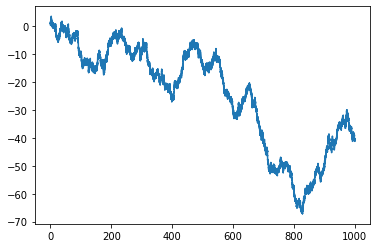

In [81]:
(times,positions) = simulate(x0,h,N,sigma,b)
plt.plot(times,positions)

Markov Chain clearly has a recurrent behaviour

In [82]:
sigma = identity
b = unit

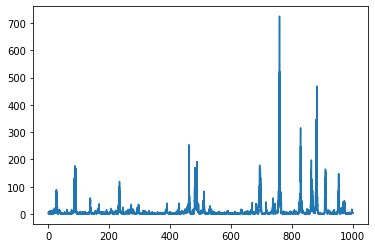

In [83]:
(times,positions) = simulate(x0,h,N,sigma,b)
plt.plot(times,positions)

Chain is still recurrent as we are still within the conditions of non blowup

In [84]:
sigma = identity
b = identity

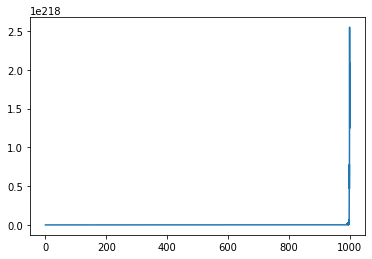

In [85]:
(times,positions) = simulate(x0,h,N,sigma,b)
plt.plot(times,positions)

Chain still seems to be recurrent, however as we are nearing blowup conditions it seems to be getting more "transient"

**Blowup conditions**

In [86]:
sigma = squared
b = unit

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in square
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in add
  """


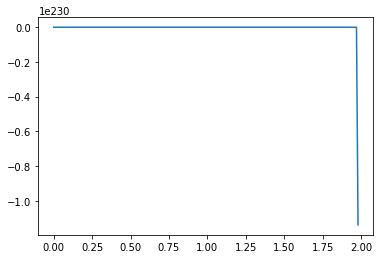

In [87]:
(times,positions) = simulate(x0,h,1000,sigma,b)
plt.plot(times,positions)

Running for even 1000 simulations results in overflow( others were run for 100,000 simulations) This shows markov chain is going to infinity and is transient

In [88]:
sigma = identity
b = squared

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in square
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in add
  """


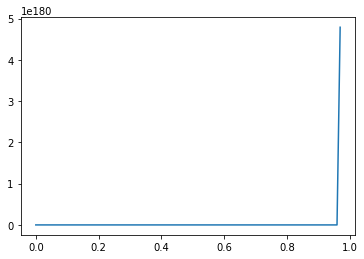

In [89]:
(times,positions) = simulate(x0,h,1000,sigma,b)
plt.plot(times,positions)

Again we see that chain the goes to  infinity and is transient